# Exploratory Data Analysis - EDA

In [ ]:
# Load the Data

In [ ]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pandas.plotting import lag_plot

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Gold_data.csv to Gold_data.csv


In [ ]:
#Load the data
df = pd.read_csv("Gold_data.csv")

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-02-01,2454.50
2,2016-03-01,2708.10
3,2016-04-01,2577.80
4,2016-05-01,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [ ]:
#View the data
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-02-01,2454.50
2,2016-03-01,2708.10
3,2016-04-01,2577.80
4,2016-05-01,2597.75


# 1. Basic information about data - EDA

### The df.info() function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data.

In [ ]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [ ]:
df.shape

(2182, 2)

### Using this function, you can see the number of null values, datatypes, and memory usage as shown in the above outputs along with descriptive statistics.

In [ ]:
#Describe the data
# Describe the data - Descriptive statistics.
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [ ]:
df.median()

price    2879.8
dtype: float64

In [ ]:
df.mode()

,date,price
0,2016-01-01,2598.7
1,2016-01-02,2892.7
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN
...,...,...
2177,2021-12-17,NaN
2178,2021-12-18,NaN
2179,2021-12-19,NaN
2180,2021-12-20,NaN


In [ ]:
df.shape

(2182, 2)

In [ ]:
print(f"Date range of gold prices available from - {df.loc[:,'date'][0]} to {df.loc[:,'date'][len(df)-1]}")

Date range of gold prices available from - 2016-01-01 00:00:00 to 2021-12-21 00:00:00


# 2. Duplicate values / Null Values

### Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [ ]:
#Find null values

df.isnull().sum()

date     0
price    0
dtype: int64

### You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data

In [ ]:
#Find the duplicates
df.duplicated().sum()

0

### Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know.

# 3. Know the datatypes

### Knowing the datatypes which you are exploring is very important and an easy process too. Let’s see how it works.

In [ ]:
#Datatypes
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

### That’s it. You have to use the dtypes function for this a shown and you will get the datatypes of each attribute.

# 3. Unique values in the data

### You can find the number of unique values in the particular column using unique() function in python.

In [ ]:
#unique values
df['date'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', ...,
       '2021-12-19T00:00:00.000000000', '2021-12-20T00:00:00.000000000',
       '2021-12-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df['price'].unique()

array([2252.6, 2454.5, 2708.1, ..., 4389.5, 4354.1, 4346.5])

### The unique() function has returned the unique values which are present in the data and it is pretty much cool!

# 4. Visualization

# 4.1 Line Plot

In [ ]:
df_eda = df.copy()
df_eda.set_index('date', inplace=True)

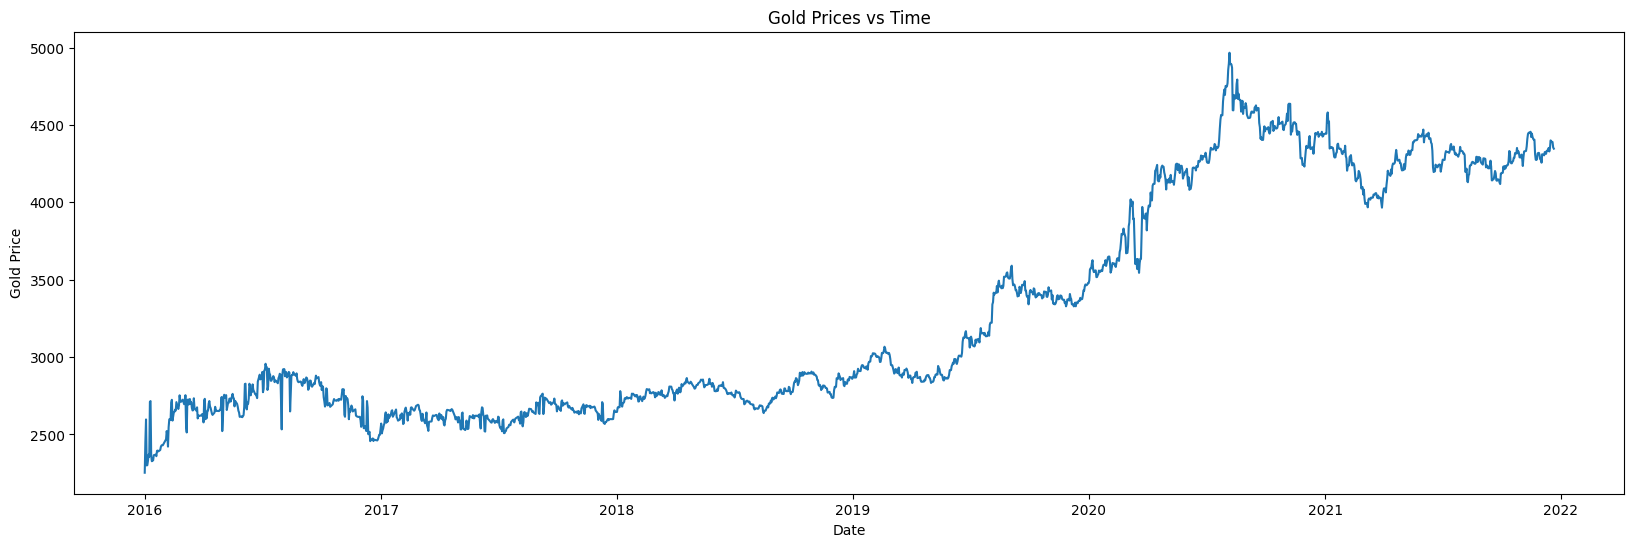

In [ ]:
# line plot
plt.figure(figsize=(20, 6))
sns.lineplot(y='price', x='date', data=df);
plt.title('Gold Prices vs Time');
plt.xlabel('Date');
plt.ylabel('Gold Price');

# 4.2 Histogram

(array([ 65., 780., 422.,  49., 187.,  35., 104., 378., 146.,  16.]),
 array([2252.6 , 2523.97, 2795.34, 3066.71, 3338.08, 3609.45, 3880.82,
        4152.19, 4423.56, 4694.93, 4966.3 ]),
 <BarContainer object of 10 artists>)

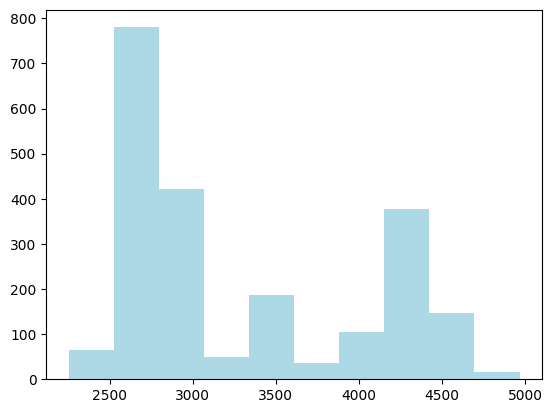

In [ ]:
plt.hist(df['price'],color='lightblue')

# From above visual trend we can see that the data has different trend at Different levels hence it is Non-Stationary

# 4.3 A quick box plot
## Find Outliers in data

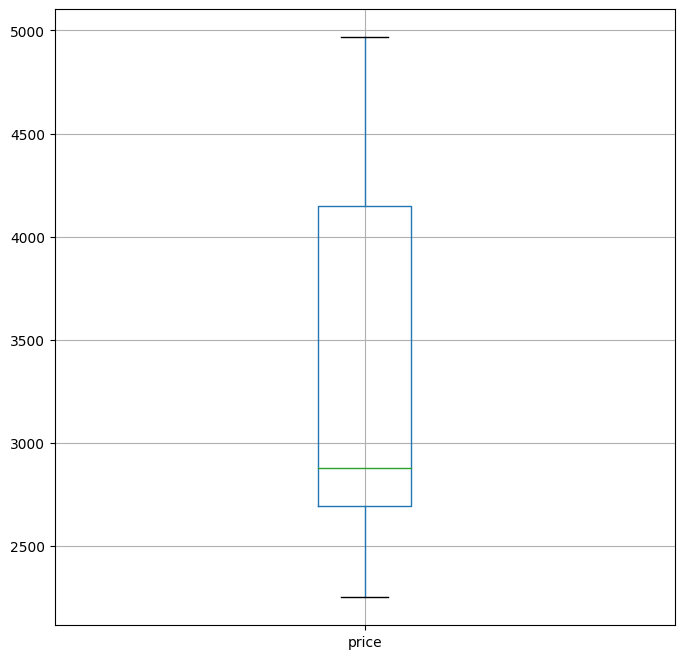

In [ ]:
### you can create a box plot for any numerical column using a single line of code.
box=df.boxplot(figsize=(8,8))

## This data have irregular trend with combination of linear & constant treand over the time

# 4.4 Time series decomposition :

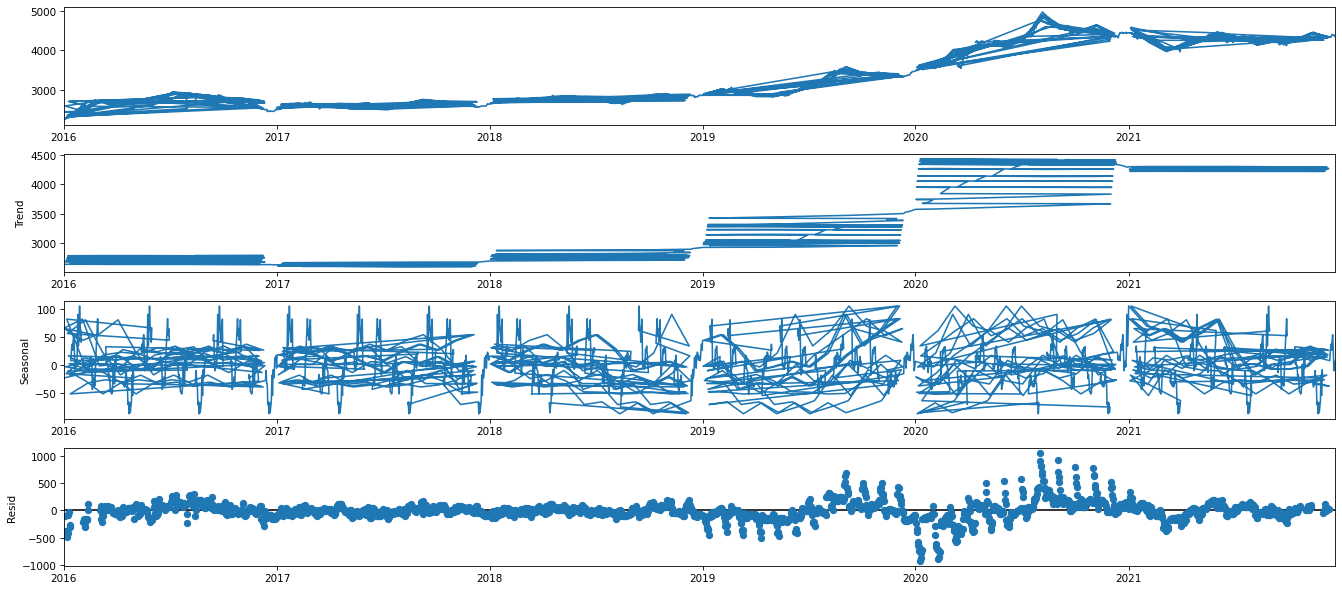

In [ ]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(df_eda, model='additive', period=120)
result.plot()
plt.show()

## - Trend - Slow moving changes in a time series, Responisble for making series gradually increase or decrease over time.
## - Seasonality - Seasonal Paterns in the series. The cycles occur repeatedly over a fixed period of time.
## - Residuals - The behaviour of the time series that cannot be explained by the trend and seasonality components. Also called random errors/white noise.

# 4.5Trend
## Visualizing changes in mean over 365 days.

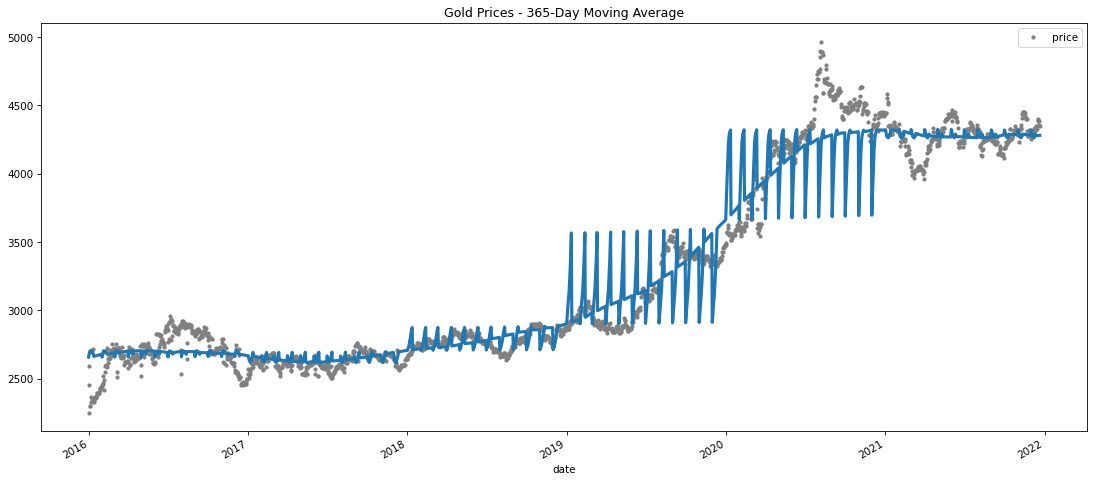

In [ ]:
moving_average = df_eda.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_eda.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Gold Prices - 365-Day Moving Average", legend=False,
);

# From the above plot, we can see that there is no constant direction of the mean (increase/decrease) which is understandable as there might be many external factors involved in price fluctuation.

# 4.6 Displot
## To Check Normality in the Data

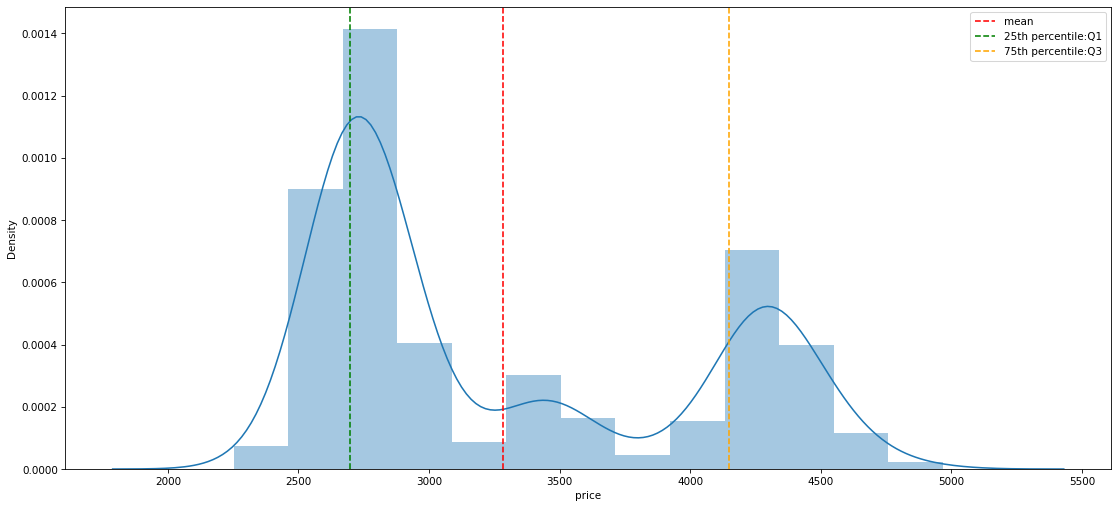

In [ ]:
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

# We can see from above's Displot Data is not Normally Distibuted.

# 4.7 Scatter Plot

<Figure size 2250x600 with 0 Axes>

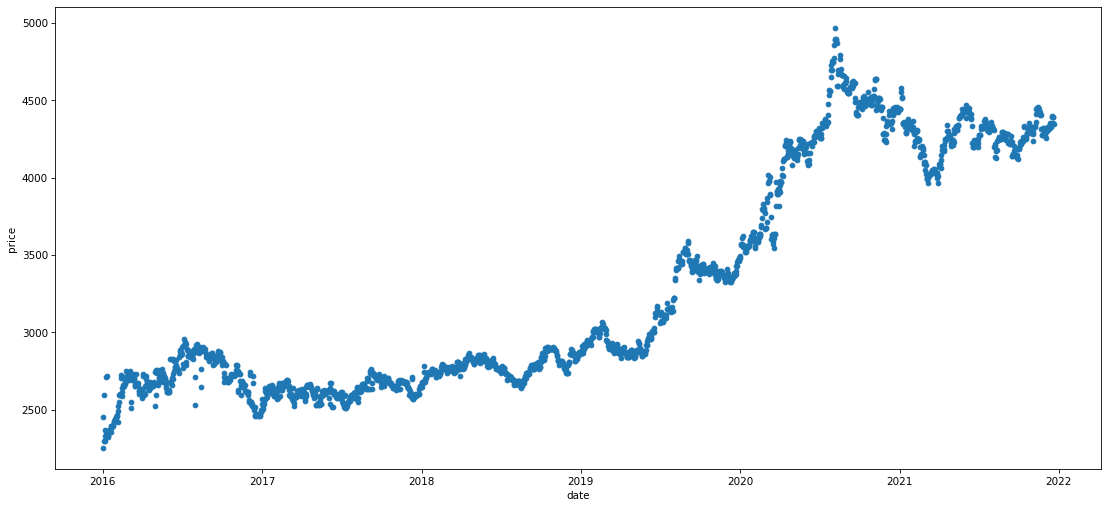

In [ ]:
plt.figure(figsize=(30,8))
df.plot(kind='scatter',x='date',y='price')
plt.show()

# Observation :
## From above visualization we can see that there is variation in the gold price  .

In [ ]:
date = pd.date_range(start='1/1/2016', end='21/12/2021', freq='M')

# 4.8 Let visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [ ]:
df=df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = df[['price','year']].groupby(by='year').sum().reset_index()

df_year

,year,price
0,2016,9.847648e+05
1,2017,9.587369e+05
2,2018,1.015407e+06
3,2019,1.149827e+06
4,2020,1.543195e+06
5,2021,1.514739e+06


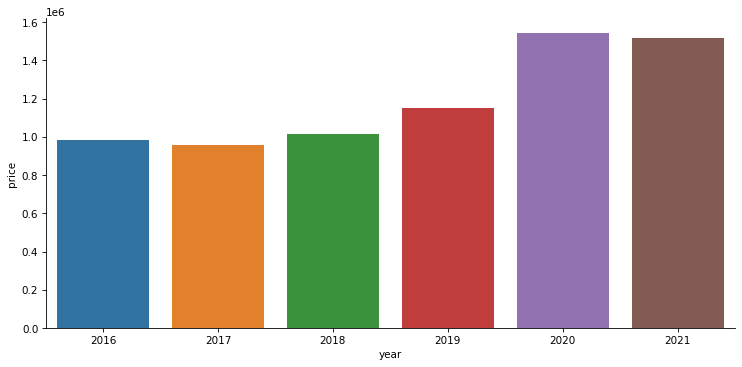

In [ ]:
sns.catplot(x='year',y='price',data=df_year,kind='bar',aspect=2)

# Pie Chart

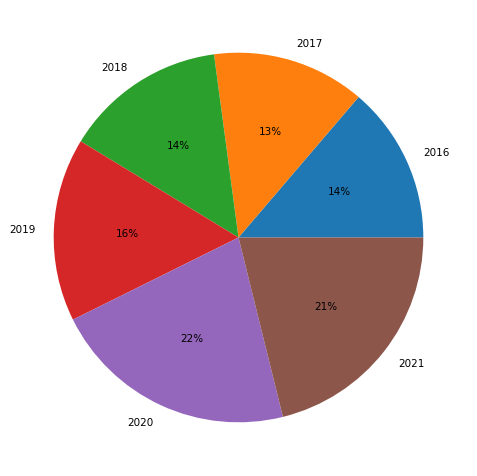

In [ ]:
plt.pie(data=df_year,x=df_year['price'],labels=df_year['year'],autopct='%.0f%%')
plt.show()

# Monthly & Yearly Gold Price (TREND & SEASONALITY)

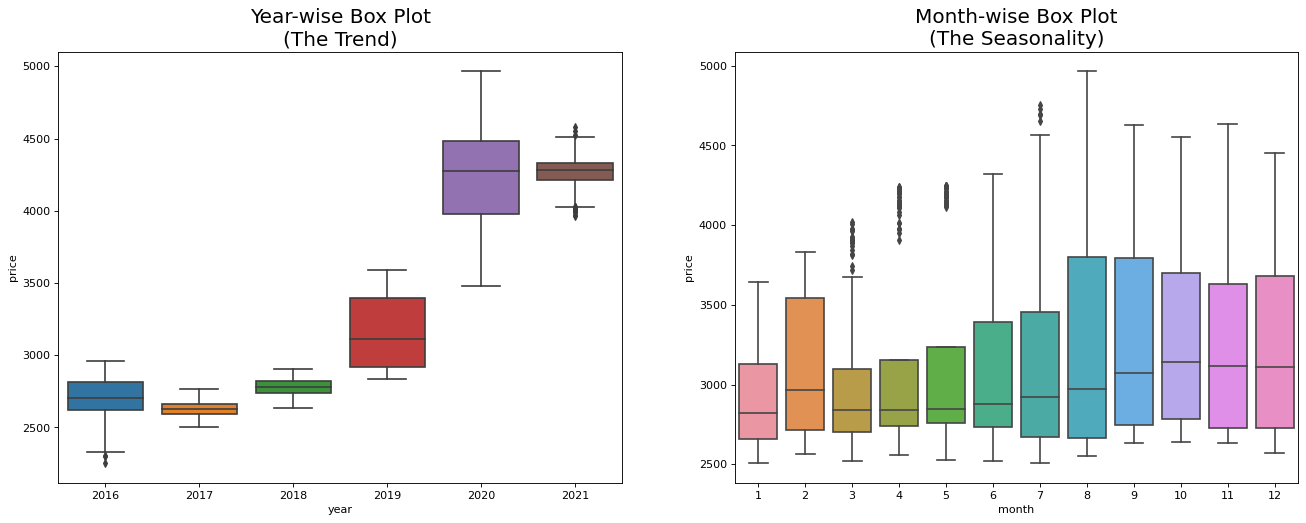

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='price', data=df, ax=axes[0])
sns.boxplot(x='month', y='price', data=df.loc[~df.year.isin([2016, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Weekly Gold Price

# 1. Weekly Box Plot

[Text(0.5, 1.0, 'Weekly Gold Price')]

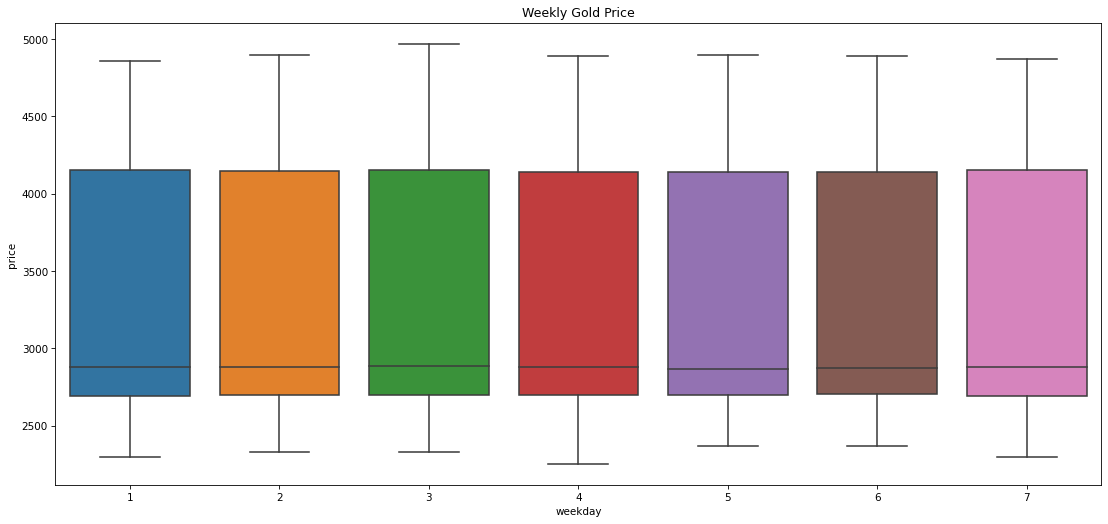

In [ ]:
plot = sns.boxplot(x='weekday', y='price', data=df)
plot.set(title='Weekly Gold Price')

# 2. Weekly Violinplot

[Text(0.5, 1.0, 'Weekly Gold-- Price')]

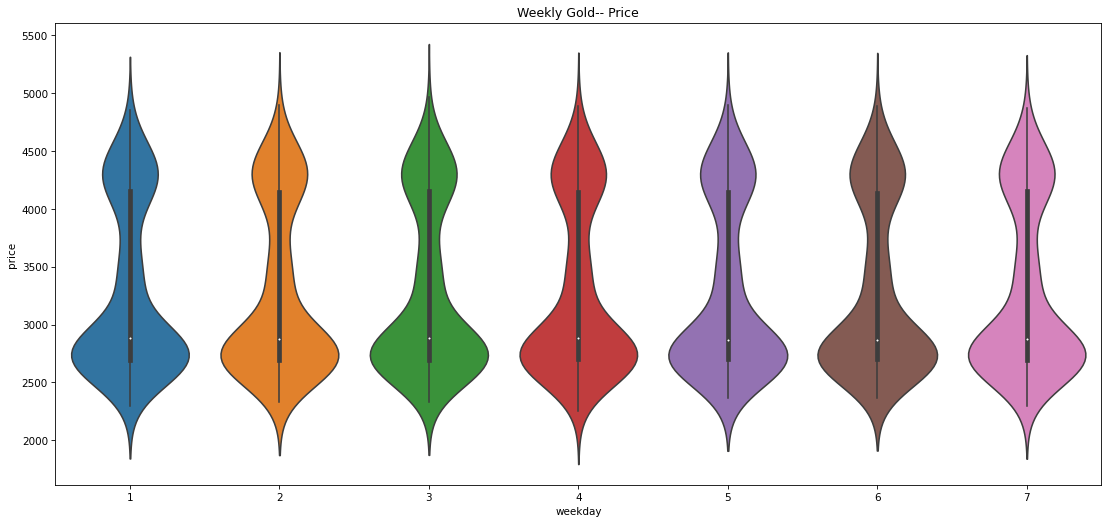

In [ ]:
plot1 = sns.violinplot(x='weekday', y='price', data=df)
plot1.set(title='Weekly Gold-- Price')

# 8. Correlation Plot - EDA

### Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [ ]:
#Correlation

df.corr()

,price,year,month,day,weekday
price,1.000000,0.880318,0.131526,0.001223,-0.000689
year,0.880318,1.000000,-0.010417,-0.008684,-0.000735
month,0.131526,-0.010417,1.000000,0.001173,0.002167
day,0.001223,-0.008684,0.001173,1.000000,-0.002243
weekday,-0.000689,-0.000735,0.002167,-0.002243,1.000000


### This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated

<function matplotlib.pyplot.show(close=None, block=None)>

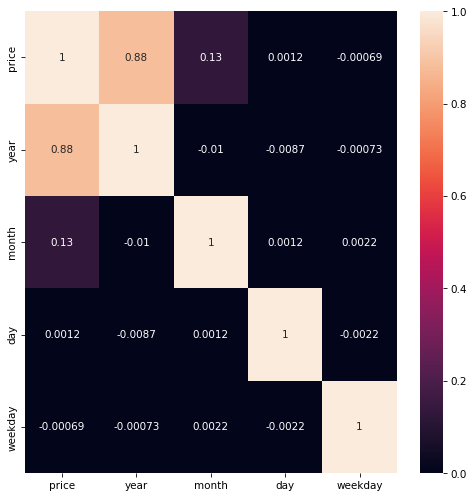

In [ ]:
#Correlation plot

corr_matrix = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(data= corr_matrix,annot=True,vmin=0)
plt.show

# 9. split the data

In [ ]:
split=round(len(df)/2)
df_1=df[0:split]
df_2=df[split:]

In [ ]:
df_1.mean()

price      2698.965628
year       2016.994500
month         6.496792
day          15.671861
weekday       4.000917
dtype: float64

In [ ]:
df_2.mean()

price      3869.934464
year       2019.981668
month         6.496792
day          15.694775
weekday       4.001833
dtype: float64

In [ ]:
df_1.var()

price      13222.816357
year           0.666025
month         11.822696
day           77.070207
weekday        4.006421
dtype: float64

In [ ]:
df_2.var()

price      336585.171545
year            0.678563
month          11.822696
day            77.566386
weekday         4.003666
dtype: float64

Data splitting 80:20

In [ ]:
X_train=df[:1827]
X_test=df[1827:]


print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

X_train Shape (1827, 6)
X_test Shape (355, 6)


FORECASTING NINE MONTHS AHEAD

In [ ]:
X_train = X_train[['date', 'price']]
X_test = X_test[['date', 'price']]

X_train.set_index('date', inplace=True)
X_test.set_index('date', inplace=True)

In [ ]:
index_9_months = pd.date_range(X_test.index[-1], freq='MS', periods=9)
index_9_months

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01'],
              dtype='datetime64[ns]', freq='MS')

DEFINE d USING ADF TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller
def define_d(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

define_d(X_train)

ADF Test Statistic : 0.40183775357213875
p-value : 0.9815635369447544
#Lags Used : 25
Number of Observations : 1801
Critical Value : {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}
** Indicating It Is Non-Stationary **


From above ADF test we came to know that the data is non stationary

Converting non- stationary data into stationary data

In [ ]:
data_diff = X_train.diff()
data_diff.dropna(inplace=True)
define_d(data_diff)

ADF Test Statistic : -19.514578834595213
p-value : 0.0
#Lags Used : 25
Number of Observations : 1800
Critical Value : {'1%': -3.4339881389288407, '5%': -2.863147035877915, '10%': -2.567625533641975}
** Data Is Stationary **


I define d = 1

DEFINE p AND q USING PACF AND ACF PLOT

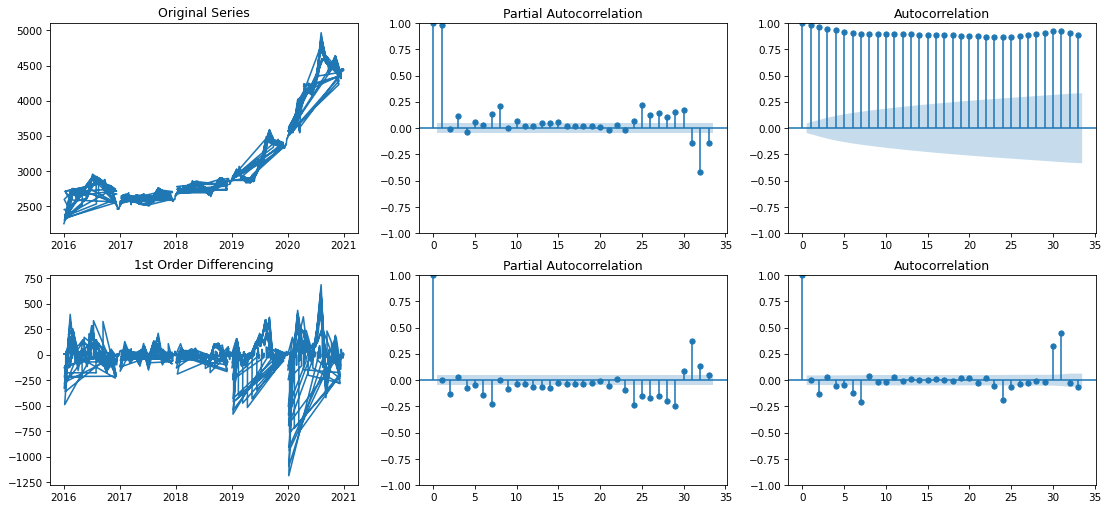

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(X_train); axes[0, 0].set_title('Original Series')
plot_pacf(X_train, ax=axes[0, 1])
plot_acf(X_train, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(X_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(X_train.diff().dropna(), ax=axes[1, 1])
plot_acf(X_train.diff().dropna(), ax=axes[1, 2])

plt.show()


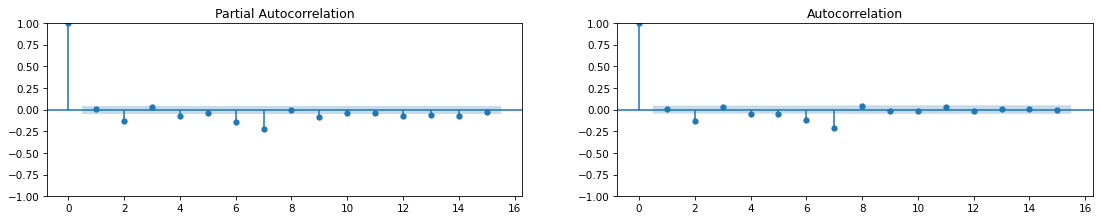

In [ ]:
plt.rcParams.update({'figure.figsize':(18,3), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
plot_pacf(X_train.diff().dropna(), lags = 15, ax=ax[0])
plot_acf(X_train.diff().dropna(), lags = 15, ax=ax[1])
plt.show()

Based on PACF and ACF, I define p = 0 and q = 0

In [ ]:
from scipy.stats.mstats import normaltest
normaltest(df.price.values) #not a normal distribution

NormaltestResult(statistic=2809.5574975162144, pvalue=0.0)

In [ ]:
log_price = np.log(df.price)
log_price

0       7.719840
1       7.805678
2       7.904003
3       7.854692
4       7.862401
          ...   
2177    8.388086
2178    8.386971
2179    8.386971
2180    8.378873
2181    8.377126
Name: price, Length: 2182, dtype: float64

<Axes: >

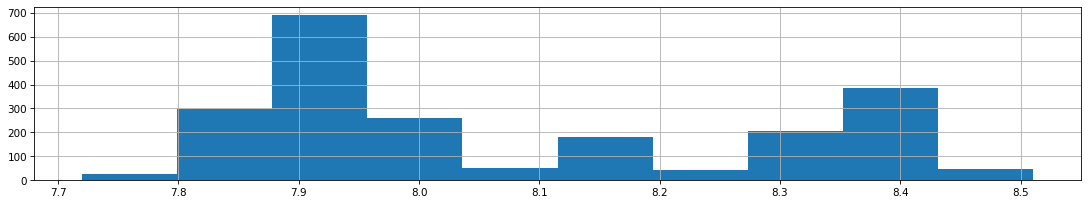

In [ ]:
log_price.hist()

In [ ]:
normaltest(log_price)

NormaltestResult(statistic=64795.27132965703, pvalue=0.0)

SQUARE ROOT TRANSFORMATION

(array([ 45., 544., 627.,  93., 135.,  83.,  55., 355., 218.,  27.]),
 array([47.4615634 , 49.76260508, 52.06364677, 54.36468845, 56.66573014,
        58.96677182, 61.26781351, 63.56885519, 65.86989688, 68.17093856,
        70.47198025]),
 <BarContainer object of 10 artists>)

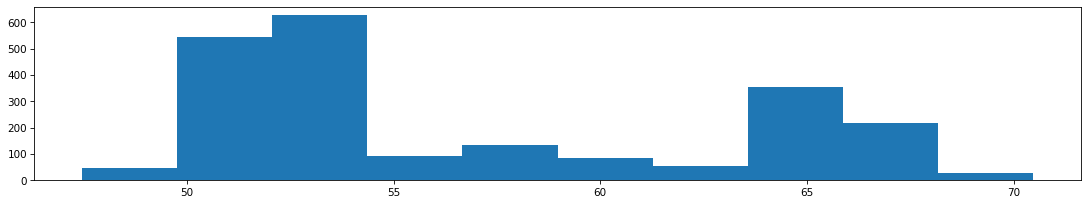

In [ ]:
sqrt_price = np.sqrt(df.price)
plt.hist(sqrt_price)

In [ ]:
normaltest(sqrt_price)

NormaltestResult(statistic=7072.617486858142, pvalue=0.0)

## Looking at the above results the mean and variance of the first part is very different from the second part. It shows another indication of non-stationary Of the data.

In [ ]:
import sys
!{sys.executable} -m pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d5cf658be10e252aa9402bfd946dd9b633c064102d4fd1c2c6c79d4e04e16daa
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 30.4 MB/s eta 0:00:00


In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sweet_report = sv.analyze(df)
sweet_report.show_html('Gold_Price.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Gold_Price.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# MODEL BUILDING

###Spliting Data

In [ ]:
df = pd.date_range(start='1/1/2016', end='21/12/2021', freq='M')
df

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

In [ ]:
df = pd.read_csv("Gold_data.csv")
df

,date,price
0,01-01-2016,2252.60
1,02-01-2016,2454.50
2,03-01-2016,2708.10
3,04-01-2016,2577.80
4,05-01-2016,2597.75
...,...,...
2177,17-12-2021,4394.40
2178,18-12-2021,4389.50
2179,19-12-2021,4389.50
2180,20-12-2021,4354.10


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-02-01,2454.50
2,2016-03-01,2708.10
3,2016-04-01,2577.80
4,2016-05-01,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [ ]:
df = df.set_index('date')

In [ ]:
train    =   df[df.index.year <= 2020]
test     =   df[df.index.year > 2020]

In [ ]:
print(train.shape)
print(test.shape)

(1827, 1)
(355, 1)


In [ ]:
print(train.shape)
print(test.shape)

(1827, 1)
(355, 1)


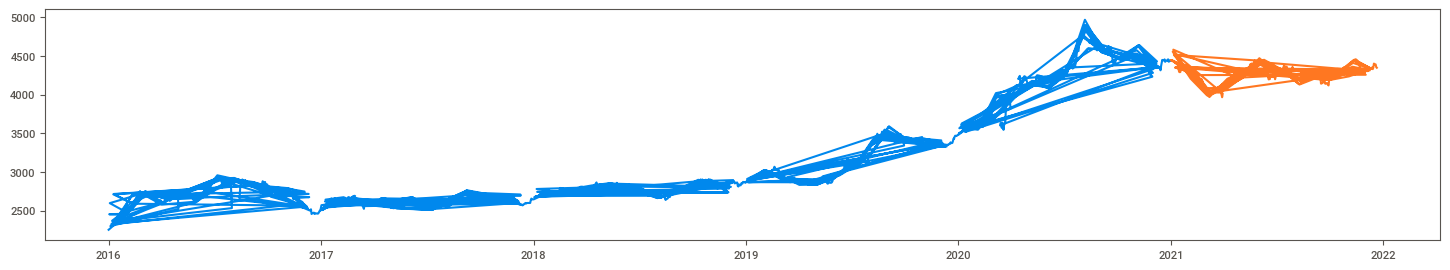

In [ ]:
plt.plot(train)
plt.plot(test)
plt.show()

# ARIMA Model

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.1 MB/s eta 0:00:00


In [ ]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22374.613, Time=3.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22546.376, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22548.368, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22548.362, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22544.571, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22516.950, Time=0.98 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22518.306, Time=0.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22383.062, Time=4.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22381.946, Time=9.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22538.332, Time=1.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22380.067, Time=8.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22520.203, Time=2.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22353.620, Time=13.38 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=22336.771, Time=14.51 sec
 ARIMA(4,1,2)(0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1827
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -11160.353
Date:                Wed, 26 Jul 2023   AIC                          22336.706
Time:                        06:20:06   BIC                          22380.785
Sample:                             0   HQIC                         22352.965
                               - 1827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1765      0.099      1.775      0.076      -0.018       0.371
ar.L1          1.2939      0.100     12.998      0.000       1.099       1.489
ar.L2         -0.5235      0.088     -5.933      0.000      -0.696      -0.351
ar.L3          0.2176      0.034      6.447      0.000       0.151       0.284
ar.L4         -0.1743      0.020     -8.516      0.000      -0.214      -0.134
ma.L1         -1.3940      0.105    -13.232      0.000      -1.601      -1.188
ma.L2          0.4192      0.103      4.079      0.000       0.218       0.621
sigma2      1.209e+04    137.894     87.645      0.000    1.18e+04    1.24e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             46882.94
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['price'],order = (4,1,2))
result = model_arima.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1827
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -11163.532
Date:                Wed, 26 Jul 2023   AIC                          22341.065
Time:                        06:20:10   BIC                          22379.634
Sample:                             0   HQIC                         22355.292
                               - 1827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3392      0.094     14.233      0.000       1.155       1.524
ar.L2         -0.5557      0.083     -6.656      0.000      -0.719      -0.392
ar.L3          0.2028      0.033      6.184      0.000       0.138       0.267
ar.L4         -0.1590      0.020     -7.805      0.000      -0.199      -0.119
ma.L1         -1.4290      0.101    -14.201      0.000      -1.626      -1.232
ma.L2          0.4562      0.097      4.710      0.000       0.266       0.646
sigma2      1.195e+04    133.192     89.741      0.000    1.17e+04    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             48206.11
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+354,type='levels'))
test_pred.index = test.index
test_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
date,
2021-01-01,4420.514159
2021-02-01,4406.319429
2021-03-01,4395.781155
2021-04-01,4385.762239
2021-05-01,4378.484811
...,...
2021-12-17,4383.725999
2021-12-18,4383.725999
2021-12-19,4383.725999


In [ ]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


            predicted_mean
date                      
2021-01-01     4420.514159
2021-02-01     4406.319429
2021-03-01     4395.781155
2021-04-01     4385.762239
2021-05-01     4378.484811
...                    ...
2021-12-17     4383.725999
2021-12-18     4383.725999
2021-12-19     4383.725999
2021-12-20     4383.725999
2021-12-21     4383.725999

[355 rows x 1 columns]


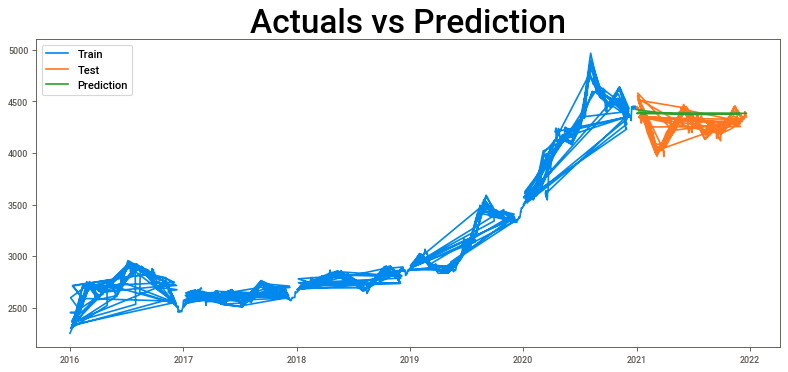

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [ ]:
mse = mean_squared_error(test_pred['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
Arima_rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',Arima_rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  26587.039210683648
Root Mean Squared Error (RMSE) =  163.06
Mean Absolute Error (MAE)  =  130.40608225434482
Mean Absolute Percentage Error (MAPE)  =  0.02974769304738575


# Forecast for the 30 Days

In [ ]:
forecast = result.predict(len(df), len(df)+31, type = 'levels')
forecast
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast.index=index_future_dates
print(forecast)

2021-12-21    4383.725999
2021-12-22    4383.725999
2021-12-23    4383.725999
2021-12-24    4383.725999
2021-12-25    4383.725999
2021-12-26    4383.725999
2021-12-27    4383.725999
2021-12-28    4383.725999
2021-12-29    4383.725999
2021-12-30    4383.725999
2021-12-31    4383.725999
2022-01-01    4383.725999
2022-01-02    4383.725999
2022-01-03    4383.725999
2022-01-04    4383.725999
2022-01-05    4383.725999
2022-01-06    4383.725999
2022-01-07    4383.725999
2022-01-08    4383.725999
2022-01-09    4383.725999
2022-01-10    4383.725999
2022-01-11    4383.725999
2022-01-12    4383.725999
2022-01-13    4383.725999
2022-01-14    4383.725999
2022-01-15    4383.725999
2022-01-16    4383.725999
2022-01-17    4383.725999
2022-01-18    4383.725999
2022-01-19    4383.725999
2022-01-20    4383.725999
2022-01-21    4383.725999
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


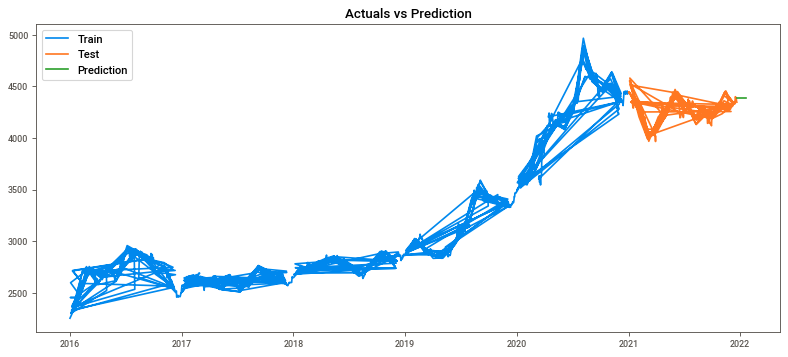

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

<Axes: >

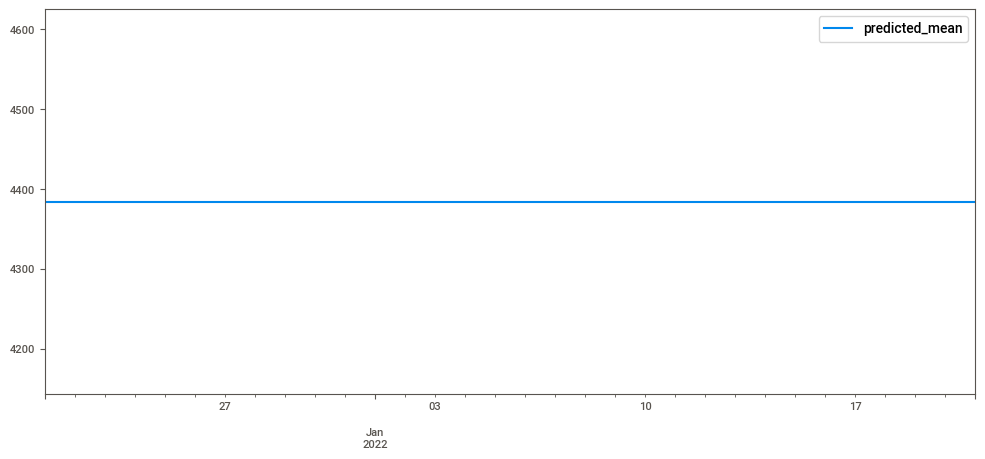

In [ ]:
forecast.plot(figsize=(12,5), legend=True)

# SARIMA

In [ ]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [ ]:
import statsmodels.api as sm

In [ ]:
model_SA = sm.tsa.SARIMAX(train['price'], order=(0,1,2), seasonal_order=(1,1,1,22))
result_SA = model_SA.fit()
result_SA.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                price   No. Observations:                 1827
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 22)   Log Likelihood              -11169.172
Date:                              Wed, 26 Jul 2023   AIC                          22348.343
Time:                                      06:20:37   BIC                          22375.832
Sample:                                           0   HQIC                         22358.489
                                             - 1827                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0070      0.017      0.414      0.679      -0.026       0.040
ma.L2         -0.1513      0.019     -7.943      0.000      -0.189      -0.114
ar.S.L22      -0.0054      0.026     -0.213      0.832      -0.056       0.045
ma.S.L22      -0.9993      0.269     -3.721      0.000      -1.526      -0.473
sigma2      1.325e+04   3486.206      3.801      0.000    6417.264    2.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             44803.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -1.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+354,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
date,
2021-01-01,4438.091602
2021-02-01,4438.079570
2021-03-01,4436.990165
2021-04-01,4460.085819
2021-05-01,4457.025197
...,...
2021-12-17,4840.693705
2021-12-18,4856.702159
2021-12-19,4855.184660


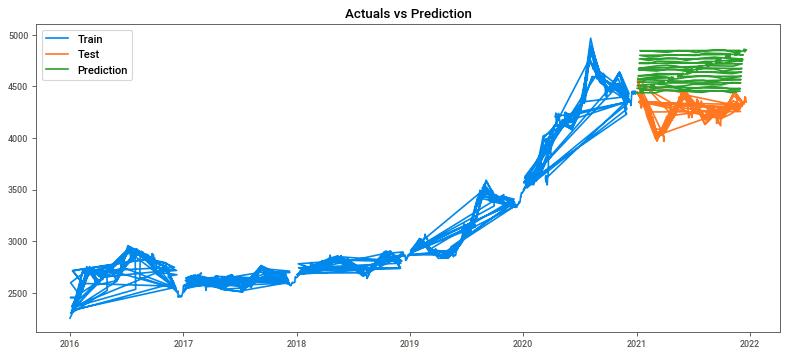

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [ ]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
Sarimax_rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',Sarimax_rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  168824.34623547408
Root Mean Squared Error (RMSE) =  410.88
Mean Absolute Error (MAE)  =  382.46775809088916
Mean Absolute Percentage Error (MAPE)  =  0.08175802910296098


# Forecast for next 30 Days

In [ ]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast_SA.index=index_future_dates
print(forecast_SA)

2021-12-21    4873.980988
2021-12-22    4870.712562
2021-12-23    4868.887758
2021-12-24    4860.417809
2021-12-25    4855.642665
2021-12-26    4870.977324
2021-12-27    4870.199353
2021-12-28    4853.311670
2021-12-29    4869.014824
2021-12-30    4878.278428
2021-12-31    4876.378428
2022-01-01    4855.049275
2022-01-02    4869.126408
2022-01-03    4879.688680
2022-01-04    4886.428316
2022-01-05    4878.253462
2022-01-06    4861.001205
2022-01-07    4866.588875
2022-01-08    4882.597330
2022-01-09    4881.079830
2022-01-10    4878.755446
2022-01-11    4876.905360
2022-01-12    4899.876159
2022-01-13    4896.607733
2022-01-14    4894.782929
2022-01-15    4886.312980
2022-01-16    4881.537836
2022-01-17    4896.872495
2022-01-18    4896.094524
2022-01-19    4879.206840
2022-01-20    4894.909995
2022-01-21    4904.173599
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


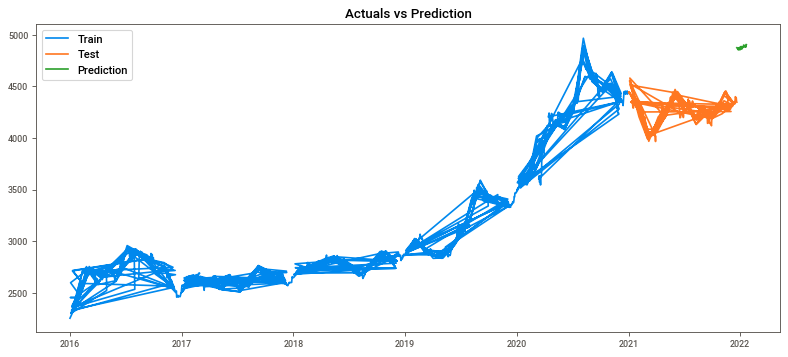

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

# Holt Method

In [ ]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
'''Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
#### Set the value of Alpha and define m (Time Period)'''
m = 22
alpha = 1/(2*m)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='date'>

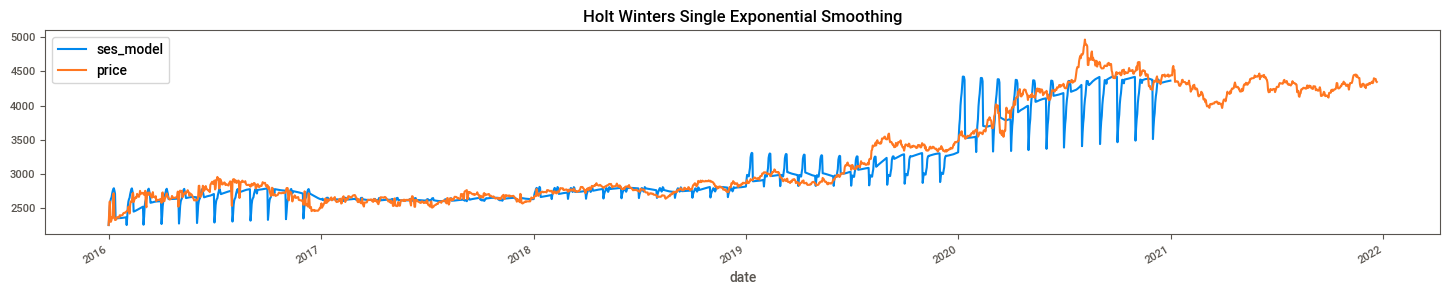

In [ ]:
# Single/Simple Exponential Method
df['ses_model'] = SimpleExpSmoothing(train["price"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','price']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
# df2['ses_model']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend'}, xlabel='date'>

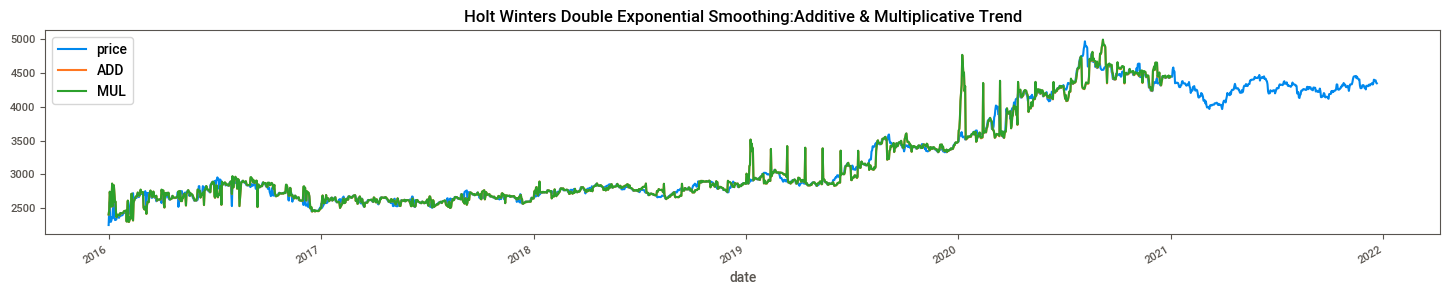

In [ ]:
df['ADD'] = ExponentialSmoothing(train['price'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['price'],trend='mul').fit().fittedvalues
df[['price','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')

In [ ]:
# Fit the model tend='mul', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=11).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


date
2021-01-01    4445.615630
2021-02-01    4454.732454
2021-03-01    4470.522713
2021-04-01    4472.526703
2021-05-01    4480.093523
                 ...     
2021-12-17    5493.152117
2021-12-18    5484.030379
2021-12-19    5490.070931
2021-12-20    5500.631586
2021-12-21    5519.429523
Length: 355, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


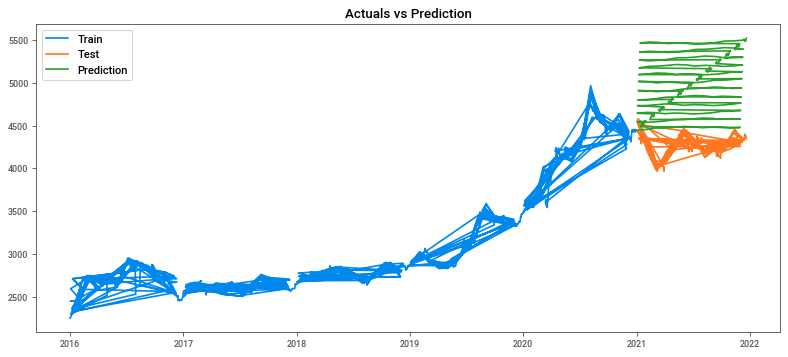

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [ ]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
HoltSE_rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',HoltSE_rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  609486.7459408524
Root Mean Squared Error (RMSE) =  780.7
Mean Absolute Error (MAE)  =  718.6096795105641
Mean Absolute Percentage Error (MAPE)  =  0.16889242986826036


In [ ]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]

 # To print ouput in date format
print(test_predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


date
2021-01-01    4445.089041
2021-02-01    4431.911891
2021-03-01    4426.647571
2021-04-01    4432.483683
2021-05-01    4444.304407
                 ...     
2021-12-17    5244.651749
2021-12-18    5251.131613
2021-12-19    5264.700133
2021-12-20    5281.452284
2021-12-21    5264.819896
Length: 355, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


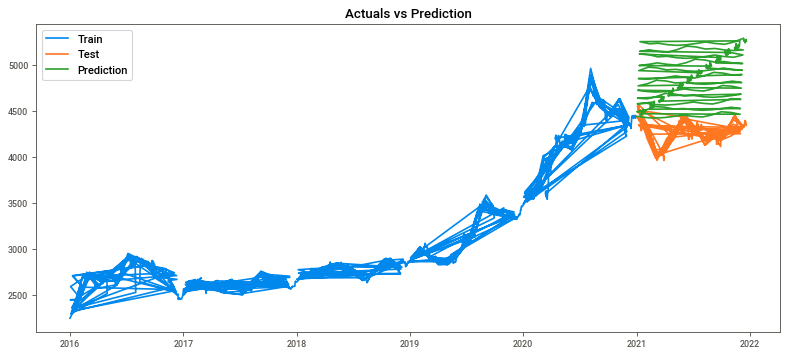

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [ ]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  410250.73446558026
Root Mean Squared Error (RMSE) =  640.51
Mean Absolute Error (MAE)  =  590.4956963029356
Mean Absolute Percentage Error (MAPE)  =  0.13892308235269726


In [ ]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=10).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


date
2021-01-01    4475.085922
2021-02-01    4489.098915
2021-03-01    4490.485475
2021-04-01    4483.385656
2021-05-01    4478.090930
                 ...     
2021-12-17    5468.838995
2021-12-18    5482.851988
2021-12-19    5484.238548
2021-12-20    5477.138729
2021-12-21    5471.844003
Length: 355, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


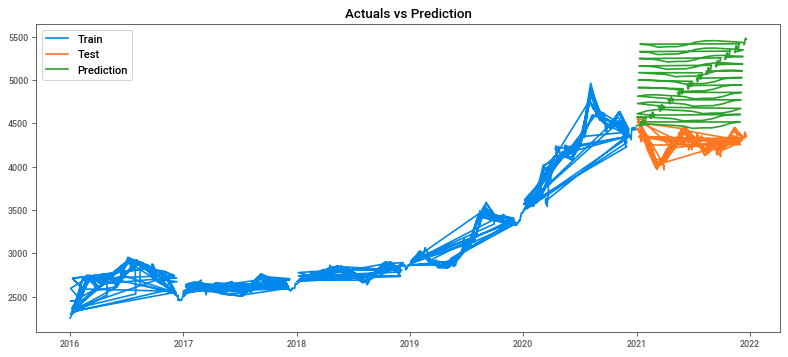

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [ ]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
HoltDE_rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',HoltDE_rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  566008.3179181707
Root Mean Squared Error (RMSE) =  752.34
Mean Absolute Error (MAE)  =  692.992093012126
Mean Absolute Percentage Error (MAPE)  =  0.16290132297972168


# EMA

In [ ]:
df['EMA'] = train['price'].ewm(span=22).mean()

In [ ]:
df['EMA']

date
2016-01-01    2252.600000
2016-02-01    2358.138636
2016-03-01    2485.550585
2016-04-01    2511.848585
2016-05-01    2532.287586
                 ...     
2021-12-17            NaN
2021-12-18            NaN
2021-12-19            NaN
2021-12-20            NaN
2021-12-21            NaN
Name: EMA, Length: 2182, dtype: float64

In [ ]:
df['EMA_t'] = test['price'].ewm(span=22).mean()

In [ ]:
df['EMA_t']

date
2016-01-01            NaN
2016-02-01            NaN
2016-03-01            NaN
2016-04-01            NaN
2016-05-01            NaN
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 2182, dtype: float64

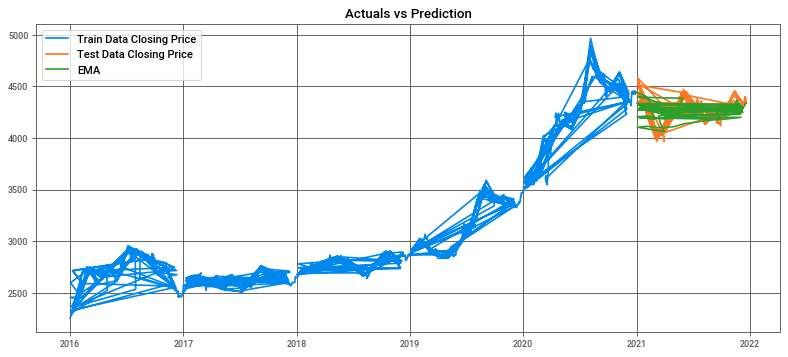

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
plt.grid(True)
plt.plot(train['price'],label='Train Data Closing Price')
plt.plot(test['price'],label='Test Data Closing Price')
plt.plot(df['EMA_t'],label='EMA')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.legend(loc=2)

In [ ]:
df['EMA_t'].dropna()

date
2021-01-01    4443.100000
2021-02-01    4402.431818
2021-03-01    4274.229663
2021-04-01    4214.811582
2021-05-01    4213.095690
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 355, dtype: float64

In [ ]:
mse = mean_squared_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  8401.060523832122
Root Mean Squared Error (RMSE) =  91.66
Mean Absolute Error (MAE)  =  66.8213045119925
Mean Absolute Percentage Error (MAPE)  =  0.015729767829439883


In [ ]:
model_evaluation=pd.Series({f"Arima_rmse":Arima_rmse,f"Sarimax_rmse":Sarimax_rmse,f"Holt Simple Exponential_rmse":HoltSE_rmse,f"Holt Double Exponential_rmse":HoltDE_rmse})
model_evaluation

Arima_rmse                      163.06
Sarimax_rmse                    410.88
Holt Simple Exponential_rmse    780.70
Holt Double Exponential_rmse    752.34
dtype: float64

In [ ]:
daily_data['e1']=daily_data['price'].shift(-1)
daily_data['e2']=daily_data['price'].shift(-2)
daily_data['e3']=daily_data['price'].shift(-3)
daily_data['e4']=daily_data['price'].shift(-4)
daily_data['e5']=daily_data['price'].shift(-5)
daily_data['e6']=daily_data['price'].shift(-6)
daily_data['e7']=daily_data['price'].shift(-7)

daily_data

,date,price,e1,e2,e3,e4,e5,e6,e7
0,2016-01-01,2252.60,2454.50,2708.10,2577.80,2597.75,2617.7,2903.8,2887.8
1,2016-02-01,2454.50,2708.10,2577.80,2597.75,2617.70,2903.8,2887.8,2813.8
2,2016-03-01,2708.10,2577.80,2597.75,2617.70,2903.80,2887.8,2813.8,2786.8
3,2016-04-01,2577.80,2597.75,2617.70,2903.80,2887.80,2813.8,2786.8,2759.8
4,2016-05-01,2597.75,2617.70,2903.80,2887.80,2813.80,2786.8,2759.8,2549.0
...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,4389.50,4389.50,4354.10,4346.50,NaN,NaN,NaN
2178,2021-12-18,4389.50,4389.50,4354.10,4346.50,NaN,NaN,NaN,NaN
2179,2021-12-19,4389.50,4354.10,4346.50,NaN,NaN,NaN,NaN,NaN
2180,2021-12-20,4354.10,4346.50,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
daily_data=daily_data.dropna()
daily_data

,date,price,e1,e2,e3,e4,e5,e6,e7
0,2016-01-01,2252.60,2454.50,2708.10,2577.80,2597.75,2617.7,2903.8,2887.8
1,2016-02-01,2454.50,2708.10,2577.80,2597.75,2617.70,2903.8,2887.8,2813.8
2,2016-03-01,2708.10,2577.80,2597.75,2617.70,2903.80,2887.8,2813.8,2786.8
3,2016-04-01,2577.80,2597.75,2617.70,2903.80,2887.80,2813.8,2786.8,2759.8
4,2016-05-01,2597.75,2617.70,2903.80,2887.80,2813.80,2786.8,2759.8,2549.0
...,...,...,...,...,...,...,...,...,...
2170,2021-10-12,4264.70,4448.90,4333.50,4351.40,4328.20,4348.7,4399.8,4394.4
2171,2021-11-12,4448.90,4333.50,4351.40,4328.20,4348.70,4399.8,4394.4,4389.5
2172,2021-12-12,4333.50,4351.40,4328.20,4348.70,4399.80,4394.4,4389.5,4389.5
2173,2021-12-13,4351.40,4328.20,4348.70,4399.80,4394.40,4389.5,4389.5,4354.1


In [ ]:
import numpy as np
x1,x2,x3,x4,x5,x6,x7,y=daily_data['e1'],daily_data['e2'],daily_data['e3'],daily_data['e4'],daily_data['e5'],daily_data['e6'],daily_data['e7'],daily_data['price']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)

[[2454.5  2708.1  2577.8  ... 2617.7  2903.8  2887.8 ]
 [2708.1  2577.8  2597.75 ... 2903.8  2887.8  2813.8 ]
 [2577.8  2597.75 2617.7  ... 2887.8  2813.8  2786.8 ]
 ...
 [4351.4  4328.2  4348.7  ... 4394.4  4389.5  4389.5 ]
 [4328.2  4348.7  4399.8  ... 4389.5  4389.5  4354.1 ]
 [4348.7  4399.8  4394.4  ... 4389.5  4354.1  4346.5 ]]


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
lin_model.fit(X_train,y_train)

LinearRegression()

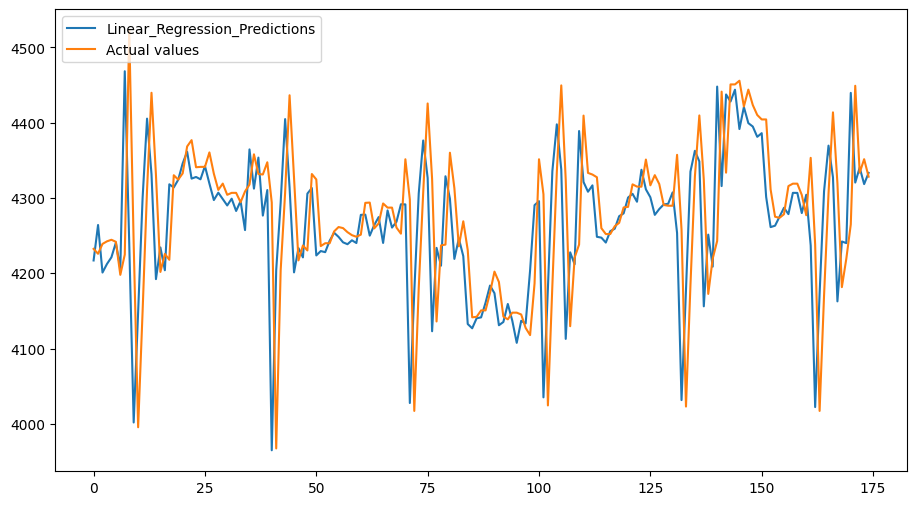

In [ ]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper left")
plt.show()

In [ ]:
print('RMSE for Linear Regression Model is:',RMSE_LR)
print('MAE for Linear Regression Model is:',MAE_LR)
print('MAPE for Linear Regression Model is:',MAPE_LR)

RMSE for Linear Regression Model is: 91.6444507578629
MAE for Linear Regression Model is: 61.46814963764925
MAPE for Linear Regression Model is: 1.452


In [ ]:
daily_data_last_7 = np.array(daily_data['price'].tail(7))
daily_data_last_7

array([4181.5, 4219.4, 4264.7, 4448.9, 4333.5, 4351.4, 4328.2])

In [ ]:
z=daily_data_last_7

for i in range(0,45):
    r=z[-7:]
    r=np.array([r])
    ranf_f=lin_model.predict(r)
    z=np.append(z,ranf_f)
    i=+1
future_pred=z[-30:]

In [ ]:
future = pd.date_range('2021-12-20','2022-01-18', freq='D')
future_df = pd.DataFrame(index=future)

In [ ]:
future_df['upcoming_sales'] = future_pred.tolist()

In [ ]:
future_df

,upcoming_sales
2021-12-20,4191.594669
2021-12-21,4214.745597
2021-12-22,4348.883828
2021-12-23,4391.768662
2021-12-24,4234.335104
2021-12-25,4313.581819
2021-12-26,4144.066299
2021-12-27,4166.176766
2021-12-28,4218.360519
2021-12-29,4302.733268


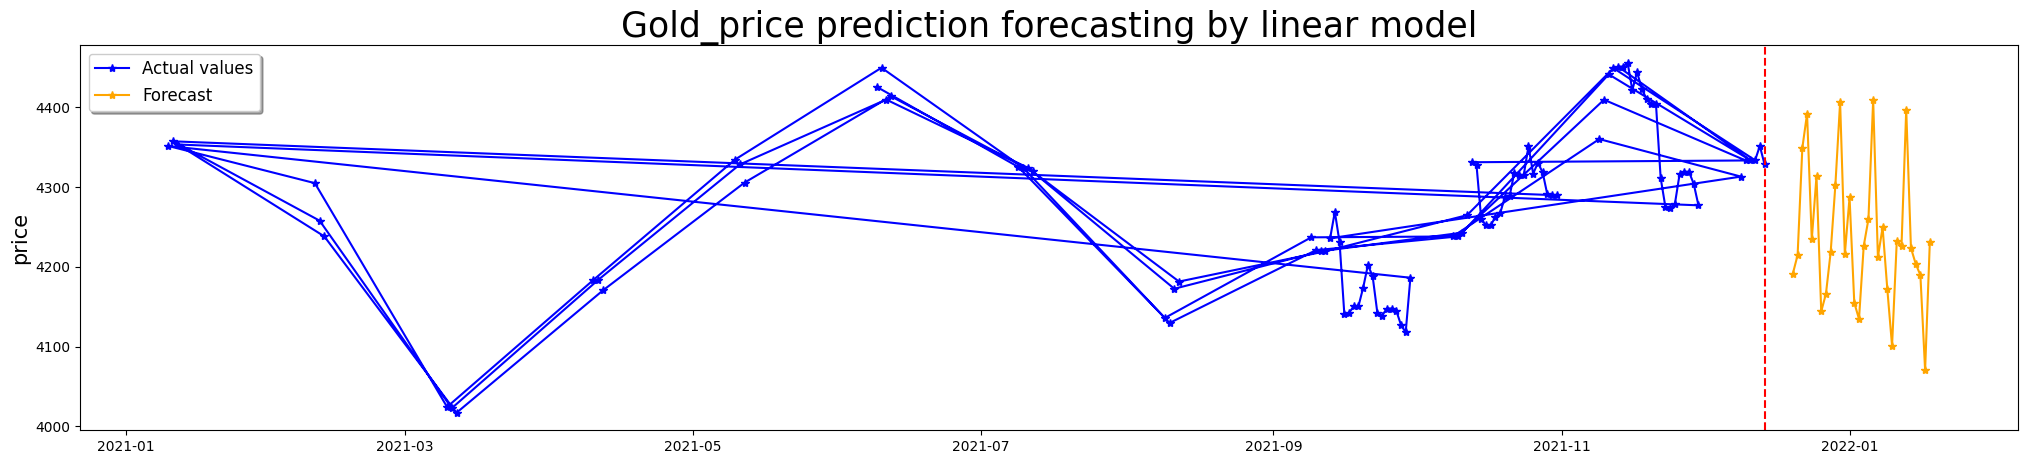

In [ ]:
plt.figure(figsize=(25,5))
plt.title("Gold_price prediction forecasting by linear model", fontsize=25)

plt.plot(daily_data['date'][-100:],daily_data['price'][-100:].values, label='Actual values', color="blue", marker="*")

plt.plot(future_df.index,future_df['upcoming_sales'].values, label='Forecast', color="orange", marker="*")

plt.axvline(daily_data['date'][-1:], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('price', fontsize=15)
plt.show()

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=cd624b4d799755c3250f597d49890216353cd791b7a7ce3f66f5e7af23e35851
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [ ]:
import pickle

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()